“Absolute i-band host magnitude” means they’ve taken the galaxy’s apparent magnitude in the observed i filter, corrected it to what it would be at a standard distance of 10 pc (i.e. applied the distance modulus)

https://sites.astro.caltech.edu/ztf/bts/explorer_info.html


In [2]:
import pandas as pd

# 1. Load your data
input_file = 'diego_data.csv'   # ← change to your actual filename/path
df = pd.read_csv(input_file)

# 2. Convert hostabs to numeric, coercing errors into NaN
df['hostabs_num'] = pd.to_numeric(df['hostabs'], errors='coerce')

# 3. Check how many failed conversion (optional)
n_bad = df['hostabs_num'].isna().sum()
if n_bad:
    print(f"Warning: {n_bad} entries in 'hostabs' could not be parsed as numbers and will be left unclassified.")

# 4. Classify using the i-band threshold
threshold_i = -19.0
def classify(mag):
    if pd.isna(mag):
        return 'unknown'
    return 'dwarf' if mag > threshold_i else 'giant'

df['galaxy_type'] = df['hostabs_num'].apply(classify)

# 5. Save full table with classifications
df.to_csv('supernova_hosts_classified.csv', index=False)


print("Done! 3 files written:\n"
      " • supernova_hosts_classified.csv\n"
     )


Done! 3 files written:
 • supernova_hosts_classified.csv
 • dwarf_hosts.csv
 • giant_hosts.csv


             SN Count  Fraction of Total
galaxy_type                             
dwarf             946           0.210129
giant            3432           0.762328
unknown           124           0.027543


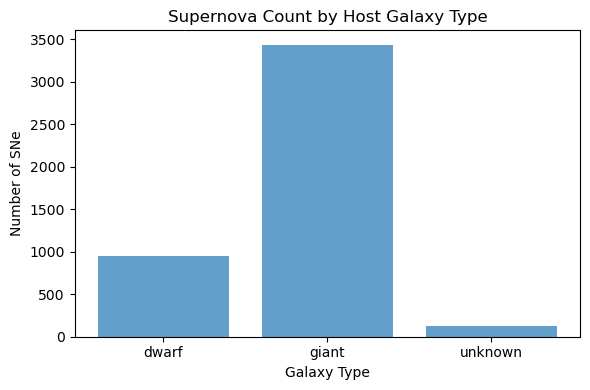

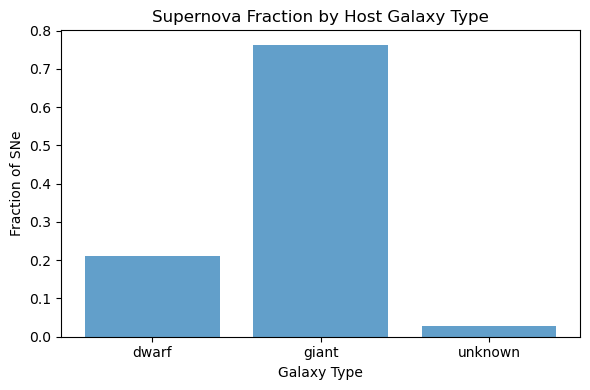

In [7]:
import os
# Limit BLAS threads to avoid resource errors
os.environ['OPENBLAS_NUM_THREADS'] = '1'

import pandas as pd
import matplotlib.pyplot as plt

# 1) Load the classified supernova dataset
df = pd.read_csv('supernova_hosts_classified.csv')

# 2) Count the number of SNe in each galaxy type and compute fractions
counts    = df['galaxy_type'].value_counts().sort_index()
fractions = counts / counts.sum()

# 3) Build a summary DataFrame
summary = pd.DataFrame({
    'SN Count':        counts,
    'Fraction of Total': fractions
})

# 4) Print the summary table
print(summary.to_string())

# 5) Plot the number of SNe by galaxy type
plt.figure(figsize=(6, 4))
plt.bar(summary.index, summary['SN Count'], alpha=0.7)
plt.xlabel('Galaxy Type')
plt.ylabel('Number of SNe')
plt.title('Supernova Count by Host Galaxy Type')
plt.tight_layout()
plt.show()

# 6) Plot the fraction of SNe by galaxy type
plt.figure(figsize=(6, 4))
plt.bar(summary.index, summary['Fraction of Total'], alpha=0.7)
plt.xlabel('Galaxy Type')
plt.ylabel('Fraction of SNe')
plt.title('Supernova Fraction by Host Galaxy Type')
plt.tight_layout()
plt.show()

